## Big O Notation
Experimenting with algorithmic time complexity in Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer

### $O(1)$  Constant Time
Function **`constTime()`** is performing the operation in the same time at every call, no matter how big $n$ is. A timer is set around the part of the function which  we want to measure.

In [90]:
def constTime(n):
    start = timer()
    n -= 1
    end = timer()
    return (end - start)

Let's defining a Monte Carlo like simulation and collect the time date in a array, we can later use for visualization. "mc" is the number of times we are simulating a full test of the algorithm.

In [93]:
n = 100
mc = 100
r = n*mc
x = np.zeros(r)
y = np.zeros(r)
cnt = 0
for j in range(0,mc):
    for i in range(0,n):
        x[cnt] = i
        y[cnt] = constTime(i+1)*10000000
        cnt += 1

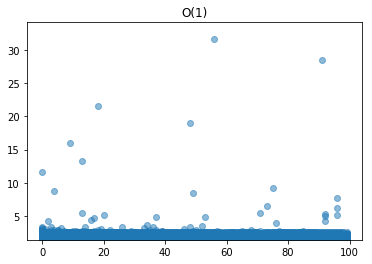

In [94]:
plt.scatter(x, y, alpha=0.5)
plt.ylim([min(y)*0.9, np.mean(y)+np.std(y)])
plt.title("O(1)")
plt.show()

Visualizing the time data we have collected. Note we have scaled the return values of function `constTime()` for better graphic representation. Certain function calls result in long execution periods, which appear to be outliers in the generated data.

### $O(\log{}n)$ Logarithmic time

In [5]:
def logTime(n):
    start = timer()
    while n > 1:
        n /= 2
    end = timer()
    return (end - start)

In [6]:
n = 100000
mc = 5
r = n*mc
x = np.zeros(r)
y = np.zeros(r)
cnt = 0
for j in range(0,mc):
    for i in range(0,n):
        x[cnt] = i
        y[cnt] = logTime(i+1)*10000000
        cnt += 1

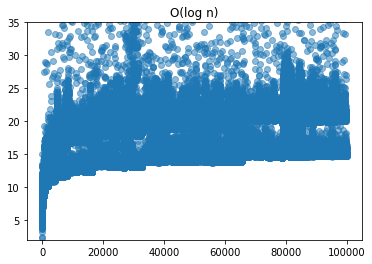

In [7]:
plt.scatter(x, y, alpha=0.5)
plt.ylim([min(y)*0.9, 35])
plt.title("O(log n)")
plt.show()

Learning from a data visualization perspective: need to find a proper range for the y-values, so the logarithmic characteristic can be seen tweaking `n`, `mc` and `ylim` by hand

### $O(n)$ Linear time

In [8]:
def linearTime(n):
    s = 0
    start = timer()
    for i in range(n):
        s += 1
    end = timer()
    return (end - start)

In [9]:
n = 100
mc = 100
r = n*mc
x = np.zeros(r)
y = np.zeros(r)
cnt = 0
for j in range(0,mc):
    for i in range(0,n):
        x[cnt] = i
        y[cnt] = linearTime(i+1)*10000000
        cnt += 1

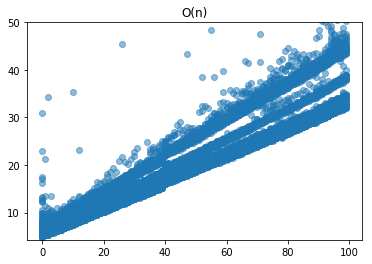

In [10]:
plt.scatter(x, y, alpha=0.5)
plt.ylim([min(y)*0.9, 50])
plt.title("O(n)")
plt.show()

### $O(n\log{}n)$ Quasilinear time
Combining the $O(n)$ example and the $O(\log{}n)$ example from above demonstrates the $O(n\log{}n)$ time complexity. 

In [95]:
def quasilinearTime(n):
    start = timer()
    for i in range(n):
        while i > 1:
            i /= 2
    end = timer()
    return (end-start)

In [96]:
n = 100
mc = 100
r = n*mc
x = np.zeros(r)
y = np.zeros(r)
cnt = 0
for j in range(0,mc):
    for i in range(0,n):
        x[cnt] = i
        y[cnt] = quasilinearTime(i+1)*10000000
        cnt += 1

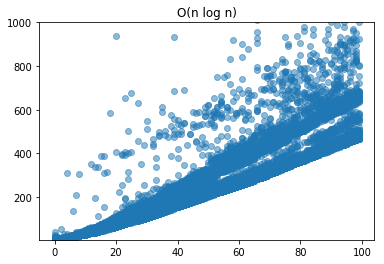

In [97]:
plt.scatter(x, y, alpha=0.5)
plt.ylim([min(y)*0.9, 1000])
plt.title("O(n log n)")
plt.show()

Looking at the data for $n\le30$ also shows the quasilinear nature of the algorithm.

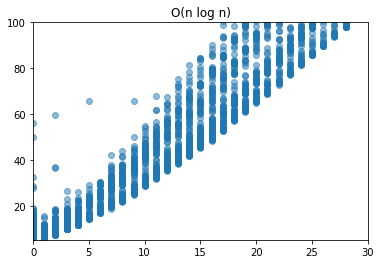

In [63]:
plt.scatter(x, y, alpha=0.5)
plt.xlim([0,30])
plt.ylim([min(y)*0.9, 100])
plt.title("O(n log n)")
plt.show()

The merge sort algorithm is another example for $O(n\log{}n)$ time complexity.

In [98]:
def quasilinearTime2(n_list):
    
    if len(n_list) < 2:
        return n_list
    
    middle = int(len(n_list) / 2)
    left = quasilinearTime2(n_list[:middle])
    right = quasilinearTime2(n_list[middle:])
    result = []
    while len(left) > 0 and len(right) > 0:
        if left[0] <= right[0]:
            result.append(left[0])
            left.pop(0)
        else:
            result.append(right[0])
            right.pop(0)
    result += left
    result += right
    
    return result

In [99]:
test_list = list(np.random.randint(1,1000,1000))

In [100]:
n = len(test_list)
mc = 5
r = n*mc
x = np.zeros(r)
y = np.zeros(r)
cnt = 0
for j in range(0,mc):
    for i in range(0,n):
        x[cnt] = i
        start = timer()
        quasilinearTime2(test_list[:i+1])
        end = timer()
        y[cnt] = (end - start)
        cnt += 1

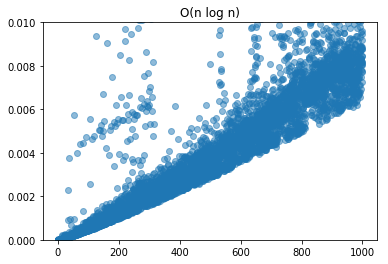

In [35]:
plt.scatter(x, y, alpha=0.5)
plt.ylim([min(y)*0.9, 0.01])
plt.title("O(n log n)")
plt.show()

### $O(n^2)$ Polynomial time

In [81]:
def polyTime(n):
    s = 0
    start = timer()
    for i in range(n):
        for j in range(n):
            s += 1
    end = timer()
    return (end-start)

In [82]:
n = 50
mc = 100
r = n*mc
x = np.zeros(r)
y = np.zeros(r)
cnt = 0
for j in range(0,mc):
    for i in range(0,n):
        x[cnt] = i
        y[cnt] = polyTime(i+1)*10000000
        cnt += 1

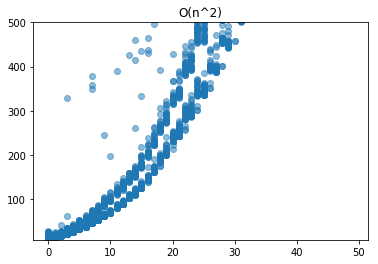

In [83]:
plt.scatter(x, y, alpha=0.5)
plt.ylim([min(y)*0.9, 500])
plt.title("O(n^2)")
plt.show()

Using three `for-loops` demonstrates $O(n^3)$.

In [87]:
def polyTime2(n):
    s = 0
    start = timer()
    for i in range(n):
        for j in range(n):
            for k in range(n):
                s += 1
    end = timer()
    return (end-start)

In [88]:
n = 50
mc = 100
r = n*mc
x = np.zeros(r)
y = np.zeros(r)
cnt = 0
for j in range(0,mc):
    for i in range(0,n):
        x[cnt] = i
        y[cnt] = polyTime2(i+1)*10000000
        cnt += 1

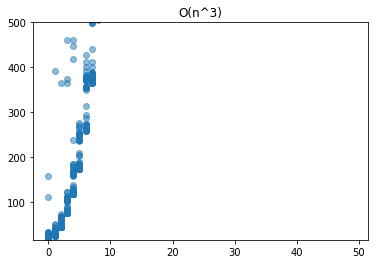

In [89]:
plt.scatter(x, y, alpha=0.5)
plt.ylim([min(y)*0.9, 500])
plt.title("O(n^3)")
plt.show()

### $O(x^n)$ Exponential time
"Towers of Hanoi" is an example for a recursive algorithm with $O(2^n)$. See also [Stackoverflow](https://stackoverflow.com/questions/34915869/example-of-big-o-of-2n). 

In [110]:
def expTime(n, fp, tp, sp):
    if (n < 1):
        return
    
    if (n > 1):
        expTime(n-1, fp, sp, tp)
    
    if (n > 1):
        expTime(n-1, sp, tp, fp)

    return

In [138]:
n = 20
mc = 100
r = n*mc
x = np.zeros(r)
y = np.zeros(r)
cnt = 0
for j in range(0,mc):
    for i in range(0,n):
        x[cnt] = i
        start = timer()
        expTime(i+1,1,2,3)
        end = timer()
        y[cnt] = (end - start)*100000
        cnt += 1

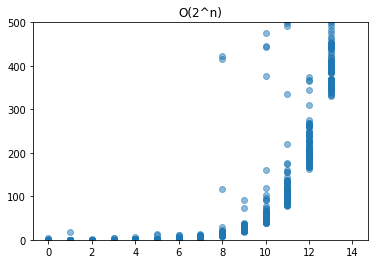

In [137]:
plt.scatter(x, y, alpha=0.5)
plt.ylim([min(y)*0.9, 500])
plt.title("O(2^n)")
plt.show()